In [1]:
from nuscenes.nuscenes import NuScenes
from nuscenes.nuscenes import NuScenesExplorer
import os

In [2]:
data_dir = '../Nusc/v1.0-mini'
nusc = NuScenes(version='v1.0-mini', dataroot=data_dir, verbose=True)
nusc_exp = NuScenesExplorer(nusc)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.471 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [3]:
# from scnene data token, list all the sensor & annotation data
nusc_exp.list_sample(nusc.sample[0]['token'])

Sample: ca9a282c9e77460f8360f564131a8af5

sample_data_token: 37091c75b9704e0daa829ba56dfa0906, mod: radar, channel: RADAR_FRONT
sample_data_token: 11946c1461d14016a322916157da3c7d, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 491209956ee3435a9ec173dad3aaf58b, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 312aa38d0e3e4f01b3124c523e6f9776, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 07b30d5eb6104e79be58eadf94382bc1, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 9d9bf11fb0e144c8b446d54a8a00184f, mod: lidar, channel: LIDAR_TOP
sample_data_token: e3d495d4ac534d54b321f50006683844, mod: camera, channel: CAM_FRONT
sample_data_token: aac7867ebf4f446395d29fbd60b63b3b, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 79dbb4460a6b40f49f9c150cb118247e, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 03bea5763f0f4722933508d5999c5fd8, mod: camera, channel: CAM_BACK
sample_data_token: 43893a033f9c46d4a51b5e08a67a1eb7, mod: camera, channel:

In [4]:
nusc_exp.list_categories()

Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

In [5]:
nusc_exp.get_color('vehicle.car')

(255, 158, 0)

In [6]:
all_scenes = nusc.scene
all_samples = nusc.sample
len(all_scenes), len(all_samples)

(10, 404)

get sample data functions are likely deprecated and we should not be using it


{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

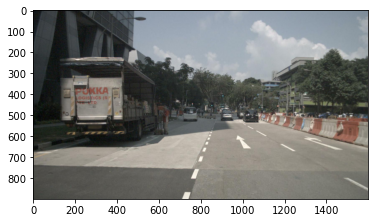

In [7]:
import matplotlib
from matplotlib import pyplot as plt
# Specific sample: Image & Annotation & Projection onto image
# Then we figure out what happens in the BEV annotation & stuff
samp = all_samples[0]
data_tok = samp['data']['CAM_FRONT']
print('get sample data functions are likely deprecated and we should not be using it')
collects = nusc.get_sample_data(data_tok)
# get specific camera image
sensor_data = nusc.get('sample_data', samp['data']['CAM_FRONT'])
img_path = nusc.dataroot + '/' + sensor_data['filename']
os.path.exists(img_path)

# read from image path constructed
img = plt.imread(img_path)
plt.imshow(img)
# now to the annotation reprojection & drawing
sensor_data

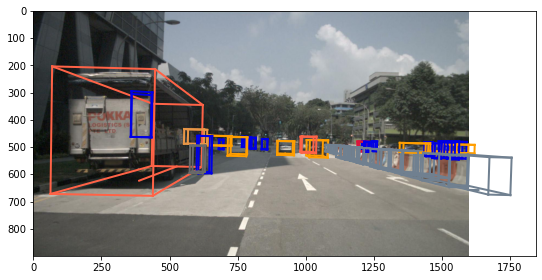

In [8]:
from nuscenes.utils.geometry_utils import view_points, box_in_image, BoxVisibility, transform_matrix
from PIL import Image
import numpy as np


sample_data_token = samp['data']['CAM_FRONT']
box_vis_level = BoxVisibility.ANY
# Load boxes and image.
data_path, boxes, camera_intrinsic = nusc.get_sample_data(sample_data_token,
                                                               box_vis_level=box_vis_level)
data = Image.open(data_path)
# Init axes
_, ax = plt.subplots(1, 1, figsize=(9, 16))
# Plot image
ax.imshow(data)
# present 3D anno bboxes
for box in boxes:
    c = np.array(nusc.explorer.get_color(box.name)) / 255.0
    box.render(ax, view=camera_intrinsic, normalize=True, colors=(c, c, c))

In [9]:
import torch
import os
import numpy as np
from PIL import Image
import cv2
from pyquaternion import Quaternion
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.splits import create_splits_scenes
from nuscenes.utils.data_classes import Box
from glob import glob

import torchvision
from functools import reduce
from nuscenes.utils.data_classes import RadarPointCloud
from nuscenes.utils.data_classes import PointCloud
from nuscenes.utils.geometry_utils import transform_matrix
from nuscenes.map_expansion.map_api import NuScenesMap
import time

import os, sys
sys.path.append('./SimpleBEV/simple_bev/')
import utils.py
import utils.geom
import itertools
import matplotlib.pyplot as plt
from nuscenesdataset import *

In [10]:
all_samples = nusc.sample
samp_rec = all_samples[0]

sd_tok = samp_rec['data']['LIDAR_TOP']
sd_rec = nusc.get('sample_data', sd_tok)
pose_rec = nusc.get('ego_pose', sd_rec['ego_pose_token'])
cs_rec = nusc.get('calibrated_sensor', sd_rec['calibrated_sensor_token'])
ref_time = 1e-6 * sd_rec['timestamp']

car2glob = transform_matrix(pose_rec['translation'], Quaternion(pose_rec['rotation']), inverse=False)
glob2car = transform_matrix(pose_rec['translation'], Quaternion(pose_rec['rotation']), inverse=True)

car2sen = transform_matrix(cs_rec['translation'], Quaternion(cs_rec['rotation']), inverse=False)
sen2car = transform_matrix(cs_rec['translation'], Quaternion(cs_rec['rotation']), inverse=True)

# Point Cloud for Current Sample Data
current_pc = LidarPointCloud.from_file(os.path.join(nusc.dataroot, sd_rec['filename']))
# transform PC under LIDAR TOP sensor towards ego car coordinate
current_pc.transform(sen2car)

# LRT LIST preparation

# ego car to global coordinate 
trans = np.array(pose_rec['translation'])

rot = Quaternion(pose_rec['rotation']).inverse

for anns_tok in samp_rec['anns']:
    inst = nusc.get('sample_annotation', anns_tok)
    if 'vehicle' not in inst['category_name']:
        # print('Non-interesting object')
        continue
    else:
        print('Interesting object')
        break

box = Box(inst['translation'], inst['size'], Quaternion(inst['rotation']))

box.translate(trans)
box.rotate(rot)

r = box.rotation_matrix
t = box.center
l = box.wlh

l = np.stack([l[1],l[0],l[2]])
lrt = utils.py.merge_lrt(l, utils.py.merge_rt(r,t))
lrt = torch.Tensor(lrt)

Interesting object


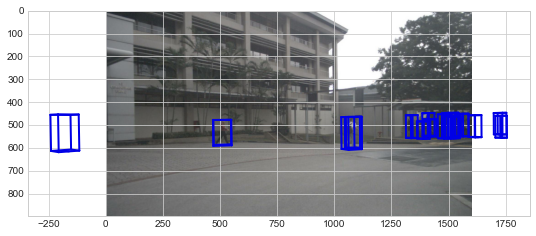

In [52]:
sample_data_token = samp['data']['CAM_FRONT']
box_vis_level = BoxVisibility.ANY
# Load boxes and image.
data_path, boxes, camera_intrinsic = nusc.get_sample_data(sample_data_token,
                                                               box_vis_level=box_vis_level)

data = Image.open(data_path)
# Init axes
_, ax = plt.subplots(1, 1, figsize=(9, 16))
# Plot image
ax.imshow(data)

data_path, boxes, _ = nusc.get_sample_data(sample_data_token = samp['data']['LIDAR_TOP'],
                                                               box_vis_level=box_vis_level)

lidar = nusc.get('sample_data', samp['data']['LIDAR_TOP'])
cam =  nusc.get('sample_data', samp['data']['CAM_FRONT'])

for box in boxes:
    # Points live in the lidar frame. So they need to be transformed via global to the image plane.
    # First step: transform the pointcloud to the ego vehicle frame for the timestamp of the sweep.
    cs_record = nusc.get('calibrated_sensor', lidar['calibrated_sensor_token'])
    # box.rotate()
    box.rotate(Quaternion(cs_record['rotation']))
    box.translate(np.array(cs_record['translation']))

    # Second step: transform from ego to the global frame.
    poserecord = nusc.get('ego_pose', lidar['ego_pose_token'])
    box.rotate(Quaternion(poserecord['rotation']))
    box.translate(np.array(poserecord['translation']))

    # Third step: transform from global into the ego vehicle frame for the timestamp of the image.
    poserecord = nusc.get('ego_pose', cam['ego_pose_token'])
    box.translate(-np.array(poserecord['translation']))
    box.rotate(Quaternion(poserecord['rotation']).inverse)

    # Fourth step: transform from ego into the camera.
    cs_record = nusc.get('calibrated_sensor', cam['calibrated_sensor_token'])
    box.translate(-np.array(cs_record['translation']))
    box.rotate(Quaternion(cs_record['rotation']).inverse)
    
    if box.center[2]<=2 or abs(box.center[0])>=18 or abs(box.center[1])>=3:
        continue

    c = np.array(nusc.explorer.get_color(box.name)) / 255.0
    box.render(ax, view=camera_intrinsic, normalize=True, colors=(c, c, c))
    # break

In [12]:
def get_lrtlist(self, rec):
    egopose = self.nusc.get('ego_pose', self.nusc.get('sample_data', rec['data']['LIDAR_TOP'])['ego_pose_token'])
    # translation is car to glob
    trans = -np.array(egopose['translation'])
    # but the rotation is glob to car? 
    rot = Quaternion(egopose['rotation']).inverse
    # why is such usage funny to me? 
    lrtlist = []
    boxlist = []
    vislist = []
    tidlist = []
    for tok in rec['anns']:
        # Therefore, in the anns annotation, box are simply given under the global coorinate system
        inst = self.nusc.get('sample_annotation', tok)
        if not self.is_lyft:
            # NuScenes filter
            if 'vehicle' not in inst['category_name']:
                continue
            if int(inst['visibility_token']) == 1:
                vislist.append(torch.tensor(0.0)) # invisible
            else:
                vislist.append(torch.tensor(1.0)) # visible
        else:
            # Lyft filter
            if inst['category_name'] not in ['bus', 'car', 'construction_vehicle', 'trailer', 'truck']:
                continue
            vislist.append(torch.tensor(1.0)) # visible

        box = Box(inst['translation'], inst['size'], Quaternion(inst['rotation']))
        box.translate(trans)
        box.rotate(rot)

        tidlist.append(inst['instance_token'])

        # print('rotation', inst['rotation'])
        r = box.rotation_matrix
        t = box.center
        l = box.wlh
        l = np.stack([l[1],l[0],l[2]])
        lrt = utils.py.merge_lrt(l, utils.py.merge_rt(r,t))
        lrt = torch.Tensor(lrt)
        lrtlist.append(lrt)
        ry, _, _ = Quaternion(inst['rotation']).yaw_pitch_roll
        # print('rx, ry, rz', rx, ry, rz)
        rs = np.stack([ry*0, ry, ry*0])
        box_ = torch.from_numpy(np.stack([t,l,rs])).reshape(9)
        # print('box_', box_)
        boxlist.append(box_)
    if len(lrtlist):
        lrtlist = torch.stack(lrtlist, dim=0)
        boxlist = torch.stack(boxlist, dim=0)
        vislist = torch.stack(vislist, dim=0)
        # tidlist = torch.stack(tidlist, dim=0)
    else:
        lrtlist = torch.zeros((0, 19))
        boxlist = torch.zeros((0, 9))
        vislist = torch.zeros((0))
        # tidlist = torch.zeros((0))
        tidlist = []

    return lrtlist, boxlist, vislist, tidlist

In [13]:
import mmcv
from mmdet.apis import init_detector, inference_detector

config_file = 'rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = 'rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
det_sample = inference_detector(model, 'demo/demo.jpg')

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



C:\Users\purpo\anaconda3\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


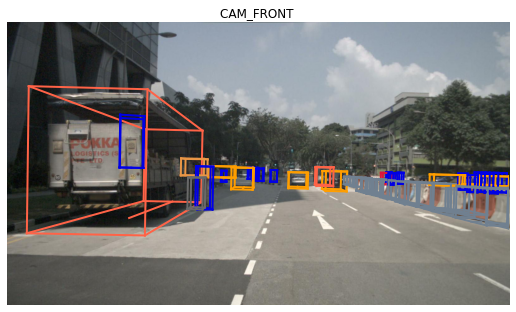

In [8]:
nusc.render_sample_data(samp['data']['CAM_FRONT'])

In [66]:
# class Naive_NuscData(torch.utils.data.Dataset):
#     def __init__(self, nusc, is_train, bounds, res_3d, nsweeps=1, seqlen=1, refcam_id=1):
#         self.nusc = nusc
#         self.is_train = is_train
#         self.nsweeps = nsweeps
#         self.seqlen = seqlen
#         self.refcam_id = refcam_id
#         # self.scenes = self.get_scenes()
#         # self.ixes = self.prepro()
#         # self.indices = self.get_indices()
#         # print('indices', self.indices.shape)
#         self.bounds = bounds
#         self.res_3d = res_3d
#         XMIN, XMAX, YMIN, YMAX, ZMIN, ZMAX = self.bounds
#         Z, Y, X = self.res_3d
        
#         # It feels like the grid configuration here instead assume Ego Vehicle Coordinate 
#         grid_conf = { # note the downstream util uses a different XYZ ordering
#             'xbound': [XMIN, XMAX, (XMAX-XMIN)/float(X)],
#             'ybound': [ZMIN, ZMAX, (ZMAX-ZMIN)/float(Z)],
#             'zbound': [YMIN, YMAX, (YMAX-YMIN)/float(Y)],
#         }
#         dx, bx, nx = gen_dx_bx(grid_conf['xbound'], grid_conf['ybound'], grid_conf['zbound'])
#         self.dx, self.bx, self.nx = dx.numpy(), bx.numpy(), nx.numpy()

In [19]:
import nuscenesdataset 

resize_lim = [1.0,1.0]
crop_offset = 0
res_scale=2
final_dim = (int(224 * res_scale), int(400 * res_scale))
ncams=6
dset='trainval'

data_aug_conf = {
        'crop_offset': crop_offset,
        'resize_lim': resize_lim,
        'final_dim': final_dim,
        'H': 900, 'W': 1600,
        'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT',
                 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'],
        'ncams': ncams,
}

scene_centroid_x = 0.0
scene_centroid_y = 1.0 # down 1 meter
scene_centroid_z = 0.0

scene_centroid_py = np.array([scene_centroid_x,
                              scene_centroid_y,
                              scene_centroid_z]).reshape([1, 3])
scene_centroid = torch.from_numpy(scene_centroid_py).float()

XMIN, XMAX = -50, 50
ZMIN, ZMAX = -50, 50
YMIN, YMAX = -5, 5
bounds = (XMIN, XMAX, YMIN, YMAX, ZMIN, ZMAX)

Z, Y, X = 200, 8, 200
res_3d=(Z,Y,X)

In [98]:
nudata = NuscData(nusc, is_train=False, data_aug_conf=data_aug_conf, bounds=bounds, res_3d=res_3d)

nudata.get_scenes()
# sorted sample scenes according to timestamp
sorted_samples = nudata.prepro()

samp = sorted_samples[0]
cams = ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT']
# Get image data, works on camera to get their cam2ego_cam parameter with intrinsic parameter
imgs, rots, trans, intrins = nudata.get_image_data(samp, cams[1:2])
# Image bin gives BEV visilization under the given Resolution parameters, together with ego2glob_lidar calibration
img_bin, glob2ego_lidar = nudata.get_binimg(samp)
# 
lrtlist, boxlist, vislist, tidlist = nudata.get_lrtlist(samp)

indices (81, 1)
NuscData: 81 samples. Split: val.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}


In [81]:
egopose = nusc.get('ego_pose', nusc.get('sample_data', samp['data']['LIDAR_TOP'])['ego_pose_token'])
trans = -np.array(egopose['translation'])
rot = Quaternion(egopose['rotation']).inverse
# Resolution parameters for NuscDataset: Construction of BEV map object
bev_img = np.zeros((nudata.nx[0], nudata.nx[1]))
for ii, tok in enumerate(samp['anns']):
    inst = nusc.get('sample_annotation', tok)
    # NuScenes filter
    if 'vehicle' not in inst['category_name']:
        continue
    if discard_invisible and int(inst['visibility_token']) == 1:
        # filter invisible vehicles
        continue
    box = Box(inst['translation'], inst['size'], Quaternion(inst['rotation']))
    box.translate(trans)
    box.rotate(rot)
    break

In [90]:
pts = box.bottom_corners()[:2].T
pts

array([[  3.27380948, -19.56026988],
       [  1.62110129, -20.41790941],
       [  3.88870783, -24.7872009 ],
       [  5.54141602, -23.92956137]])

In [92]:
pts - nudata.bx[:2] + nudata.dx[:2]/2

array([[53.27380948, 30.43973012],
       [51.62110129, 29.58209059],
       [53.88870783, 25.2127991 ],
       [55.54141602, 26.07043863]])

In [94]:
nudata.bx - nudata.dx/2

array([-50., -50.,  -5.], dtype=float32)

In [95]:
nudata.bounds

(-50, 50, -5, 5, -50, 50)

In [ ]:
nudata.dx

In [ ]:
egopose = self.nusc.get('ego_pose', self.nusc.get('sample_data', rec['data']['LIDAR_TOP'])['ego_pose_token'])
trans = -np.array(egopose['translation'])
rot = Quaternion(egopose['rotation']).inverse
img = np.zeros((self.nx[0], self.nx[1]))
for ii, tok in enumerate(rec['anns']):
    inst = self.nusc.get('sample_annotation', tok)

    if not self.is_lyft:
        # NuScenes filter
        if 'vehicle' not in inst['category_name']:
            continue
        if discard_invisible and int(inst['visibility_token']) == 1:
            # filter invisible vehicles
            continue
    else:
        # Lyft filter
        if inst['category_name'] not in ['bus', 'car', 'construction_vehicle', 'trailer', 'truck']:
            continue

    box = Box(inst['translation'], inst['size'], Quaternion(inst['rotation']))
    box.translate(trans)
    box.rotate(rot)

    # Ksgk: Takes out bottom corners of the 3D Bbox for BEV visiualization, take the Front X & Left Y coordinate from the EgoVeh Coordinate 3D Bbox
    pts = box.bottom_corners()[:2].T
    # Round on the pts, such that we can successfully plot the bbox onto the grid-based BEV image, which has only resolution-many grids on it
    pts = np.round(
        (pts - self.bx[:2] + self.dx[:2]/2.) / self.dx[:2]
        ).astype(np.int32)
    pts[:, [1, 0]] = pts[:, [0, 1]]
    cv2.fillPoly(img, [pts], ii+1.0)

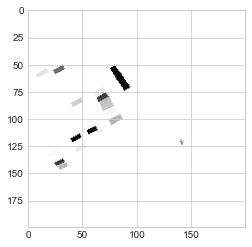

In [72]:
plt.imshow(img_bin[0])

In [69]:
img_bin.shape

torch.Size([1, 200, 200])

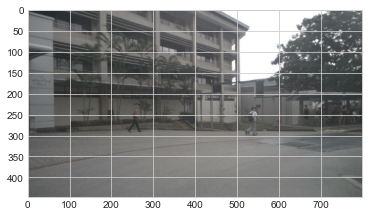

In [96]:
img = imgs[0]
img_perm = img.permute(1,2,0)
plt.imshow(img_perm)

In [47]:
# Ego vehicle coordinate ? or Front camera coordinate? looks like the front camera coordinate here ..
XMIN, XMAX = -50, 50
ZMIN, ZMAX = -50, 50
YMIN, YMAX = -5, 5
bounds = (XMIN, XMAX, YMIN, YMAX, ZMIN, ZMAX)
Z, Y, X = 200, 8, 200
res_3d=(Z,Y,X)

# Oversimplified version of NuscDataset
nuscdata = Naive_NuscData(nusc, False, bounds, res_3d)

nuscdata.dx, nuscdata.bx, nuscdata.nx

(array([0.5 , 0.5 , 1.25], dtype=float32),
 array([-49.75 , -49.75 ,  -4.375], dtype=float32),
 array([200, 200,   8], dtype=int64))

In [21]:




train_dataloader, val_dataloader = nuscenesdataset.compile_data(
        dset,
        data_dir,
        data_aug_conf=data_aug_conf,
        centroid=scene_centroid_py,
        bounds=bounds,
        res_3d=(Z,Y,X),
        bsz=B,
        nworkers=nworkers,
        shuffle=shuffle,
        use_radar_filters=use_radar_filters,
        seqlen=1, # we do not load a temporal sequence here, but that can work with this dataloader
        nsweeps=nsweeps,
        do_shuffle_cams=do_shuffle_cams,
        get_tids=True,
    )

NameError: name 'B' is not defined